In [1]:
import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

import xlrd
import os
import openpyxl
import matplotlib.pyplot as plt
import numpy as np


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 239kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [7]:
# model = load_model(filepath='/content/drive/MyDrive/Project/InceptionV3_model.hdf5')
model = load_model(filepath='./InceptionV3_model.hdf5')

In [8]:
arr = ["apple_pie","baby_back_ribs","baklava","bread_pudding","breakfast_burrito","bruschetta","caesar_salad","caprese_salad","carrot_cake","ceviche","cheesecake","chicken_curry","chicken_quesadilla","chicken_wings","chocolate_cake","chocolate_mousse","churros","clam_chowder","crab_cakes","creme_brulee","deviled_eggs","donuts","dumplings","edamame","falafel","french_fries","french_onion_soup","french_toast","frozen_yogurt","garlic_bread","gnocchi","greek_salad","grilled_salmon","guacamole","hamburger","hot_dog","huevos_rancheros","hummus","ice_cream","lasagna","lobster_bisque","macaroni_and_cheese","miso_soup","mussels","onion_rings","pad_thai","paella","pancakes","pizza","ramen","ravioli","red_velvet_cake","risotto","scallops","seaweed_salad","spaghetti_bolognese","spring_rolls","strawberry_shortcake","tiramisu","waffles"]

In [9]:
def find(name):
   a = []
   # wb = openpyxl.load_workbook('/content/drive/MyDrive/Project/Nutrition.xlsx')
   wb = openpyxl.load_workbook('./Nutrition.xlsx')
   ws = wb.active
   row_range = ws.max_row
   col_range = ws.max_column

   for i in range(1,row_range+1):
     if(ws.cell(row=i, column=1).value == name):
       for k in range(2,col_range+1):
         if(ws.cell(row=i, column=k).value == None):
            a.append(0)
         else:
            a.append(ws.cell(row=i, column=k).value)  
       return a

In [10]:
def draw(a):
  labels = ['Vitamin_C', 'Vitamin_E', 'Vitamin_B2', 'Vitamin_B3','Vitamin_B5','Vitamin_B6','Vitamin_B12','Vitamin_A','Vitamin_E','Vitamin_D']
  sizes = [a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11]]
  c = []
  for i in range(len(labels)):
    c.append(labels[i]+': '+str(sizes[i])+' ug')

  colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#faac99','#8bcc99','#7f9999','#1fcaff','#2f8099','#f8cc99']

  explode = (0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03)
  plt.figure(figsize = (8, 4)) 
  plt.pie(sizes, colors = colors, startangle=90, pctdistance=0.85, explode = explode)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  fig.legend(c, loc="right")
  fig.tight_layout()
  fig.show()

  labels = ['Calcium', 'Magnesium', 'Phosphorus', 'Iron','Potassium','Sodium','Zinc','Copper']
  sizes = [a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19]]
  c = []
  for i in range(len(labels)):
    c.append(labels[i]+': '+str(sizes[i])+' mg')

  colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#faac99','#8bcc99','#7f9999','#1fcaff']

  explode = (0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03)
  plt.figure(figsize = (8, 4)) 
  plt.pie(sizes, colors = colors, startangle=90, pctdistance=0.85, explode = explode)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  fig.legend(c, loc="right")
  fig.tight_layout()
  fig.show()
  



In [11]:
def preprocess_img(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

hamburger


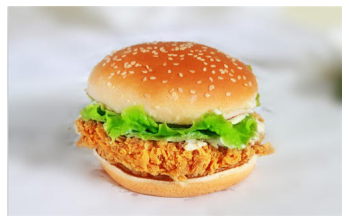

Energy:  226.0 kcal/100g
Score:  C


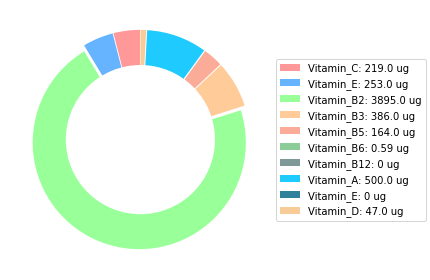

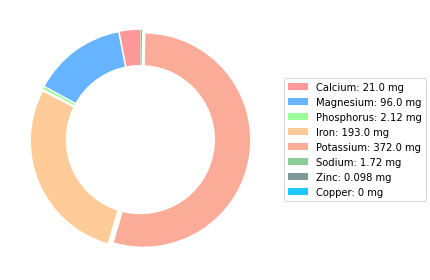

In [12]:
from PIL import Image
from keras.preprocessing import image

img_path = './hamburger.jpg' 
test_image = Image.open(img_path)
img = image.load_img(img_path, target_size=(299, 299))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr_test = preprocess_img(img_arr)
y_pred = model.predict(img_arr_test)
preds = np.argmax(y_pred, axis=1)
best_pred = collections.Counter(preds).most_common(1)[0][0]
print(arr[best_pred])
plt.imshow(test_image)
name = arr[best_pred]
plt.axis('off')
plt.show()
a = find(name)
draw(a)
print('Energy: ',a[0], 'kcal/100g')
print('Score: ',a[20])